In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Python\Vs_Python\Projects\Bitcoin_price_prediction\Dataset\merged_output.csv')

In [3]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2011-01-02T00:00:00.000Z,2011-01-02T23:59:59.999Z,2011-01-02T12:40:00.000Z,2011-01-02T00:53:00.000Z,2781,0.300264,0.367208,0.289348,0.300000,5350.48,1511302.50,2011-01-02T23:59:59.999Z
1,2011-01-03T00:00:00.000Z,2011-01-03T23:59:59.999Z,2011-01-03T01:44:00.000Z,2011-01-03T21:04:00.000Z,2781,0.300137,0.338386,0.277848,0.297348,1427.50,1500259.79,2011-01-03T23:59:59.999Z
2,2011-01-04T00:00:00.000Z,2011-01-04T23:59:59.999Z,2011-01-04T21:19:00.000Z,2011-01-04T01:47:00.000Z,2781,0.297227,0.310119,0.248605,0.299439,1883.39,1512924.00,2011-01-04T23:59:59.999Z
3,2011-01-05T00:00:00.000Z,2011-01-05T23:59:59.999Z,2011-01-05T01:49:00.000Z,2011-01-05T00:21:00.000Z,2781,0.300773,0.392055,0.288454,0.299252,356.98,1514282.20,2011-01-05T23:59:59.999Z
4,2011-01-06T00:00:00.000Z,2011-01-06T23:59:59.999Z,2011-01-06T00:24:00.000Z,2011-01-06T15:31:00.000Z,2781,0.299186,0.308228,0.254499,0.299292,3445.08,1516596.24,2011-01-06T23:59:59.999Z


In [4]:
df.shape

(5261, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261 entries, 0 to 5260
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   5261 non-null   object 
 1   timeClose  5261 non-null   object 
 2   timeHigh   5261 non-null   object 
 3   timeLow    5261 non-null   object 
 4   name       5261 non-null   int64  
 5   open       5261 non-null   float64
 6   high       5261 non-null   float64
 7   low        5261 non-null   float64
 8   close      5261 non-null   float64
 9   volume     5261 non-null   float64
 10  marketCap  5261 non-null   float64
 11  timestamp  5261 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 493.3+ KB


In [6]:
df.drop(columns=['timeOpen','timeClose','timeHigh','timeLow','name'],inplace=True)

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day

In [9]:
df = df.drop('timestamp',axis=1)

In [10]:
df.isnull().sum()

open         0
high         0
low          0
close        0
volume       0
marketCap    0
Year         0
Month        0
Day          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,open,high,low,close,volume,marketCap,Year,Month,Day
count,5261.000000,5261.000000,5261.000000,5261.000000,5.261000e+03,5.261000e+03,5261.000000,5261.000000,5261.000000
mean,16659.732124,17025.196297,16277.933456,16679.358189,1.448865e+10,3.193522e+11,2017.712602,6.423684,15.722486
std,24379.836226,24885.213663,23855.264950,24409.869713,1.994806e+10,4.790347e+11,4.163106,3.458186,8.794451
min,0.297227,0.308228,0.248605,0.297348,0.000000e+00,1.500260e+06,2011.000000,1.000000,1.000000
25%,285.066986,292.364990,281.010986,285.505005,1.734490e+07,4.063305e+09,2014.000000,3.000000,8.000000
50%,5251.480692,5359.925030,5167.419058,5268.291063,4.372764e+09,9.308616e+10,2018.000000,6.000000,16.000000
75%,26047.235240,26409.303010,25728.365570,26049.556900,2.523085e+10,5.060000e+11,2021.000000,9.000000,23.000000
max,111679.356300,111970.168100,109285.072400,111673.284000,3.510000e+11,2.220000e+12,2025.000000,12.000000,31.000000


In [13]:
corr = df.corr()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

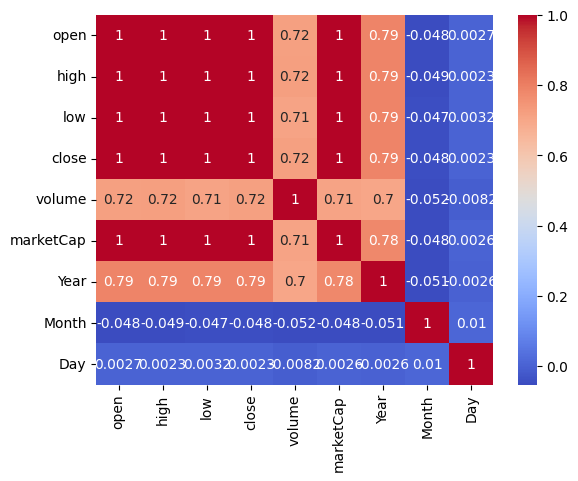

In [15]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

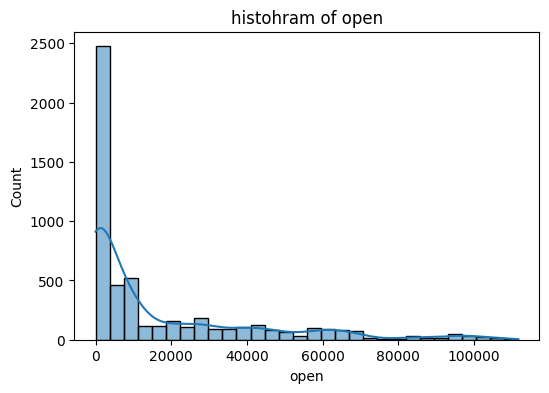

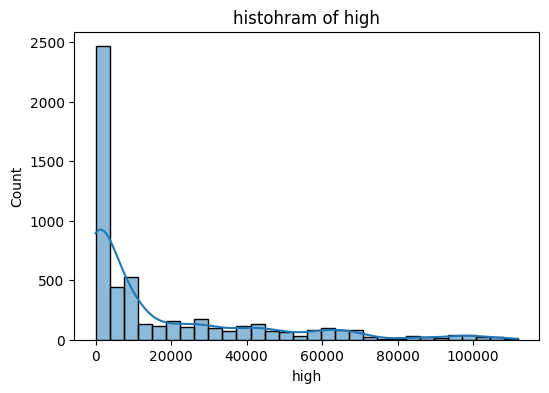

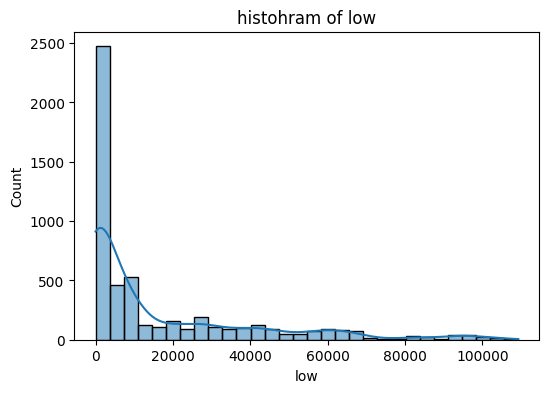

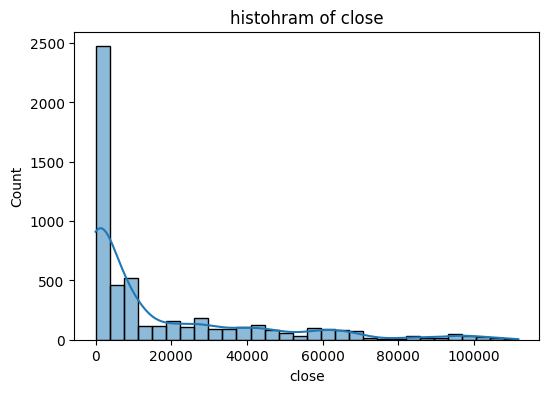

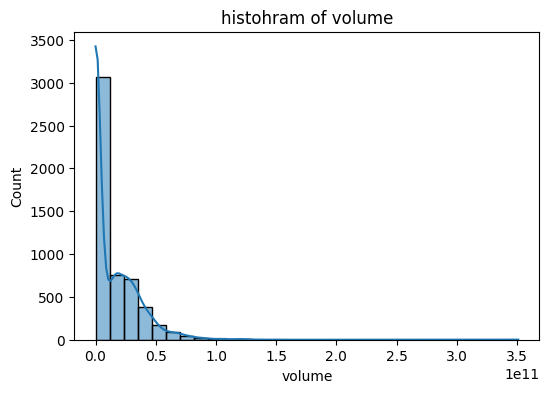

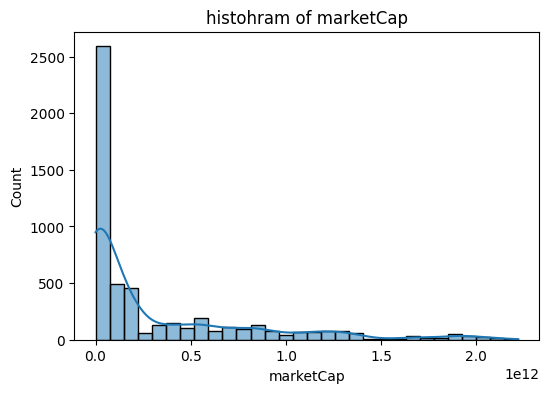

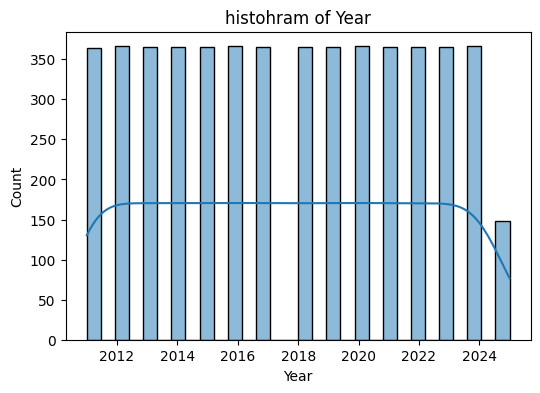

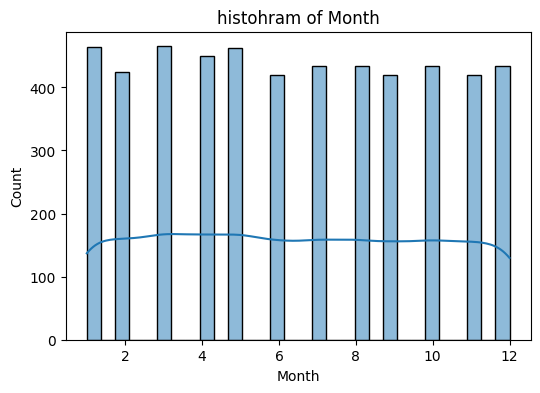

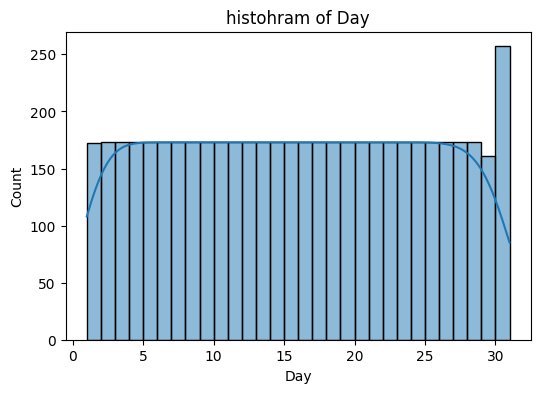

In [16]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title(f'histohram of {i}')
    plt.xlabel(f'{i}')
    plt.show()


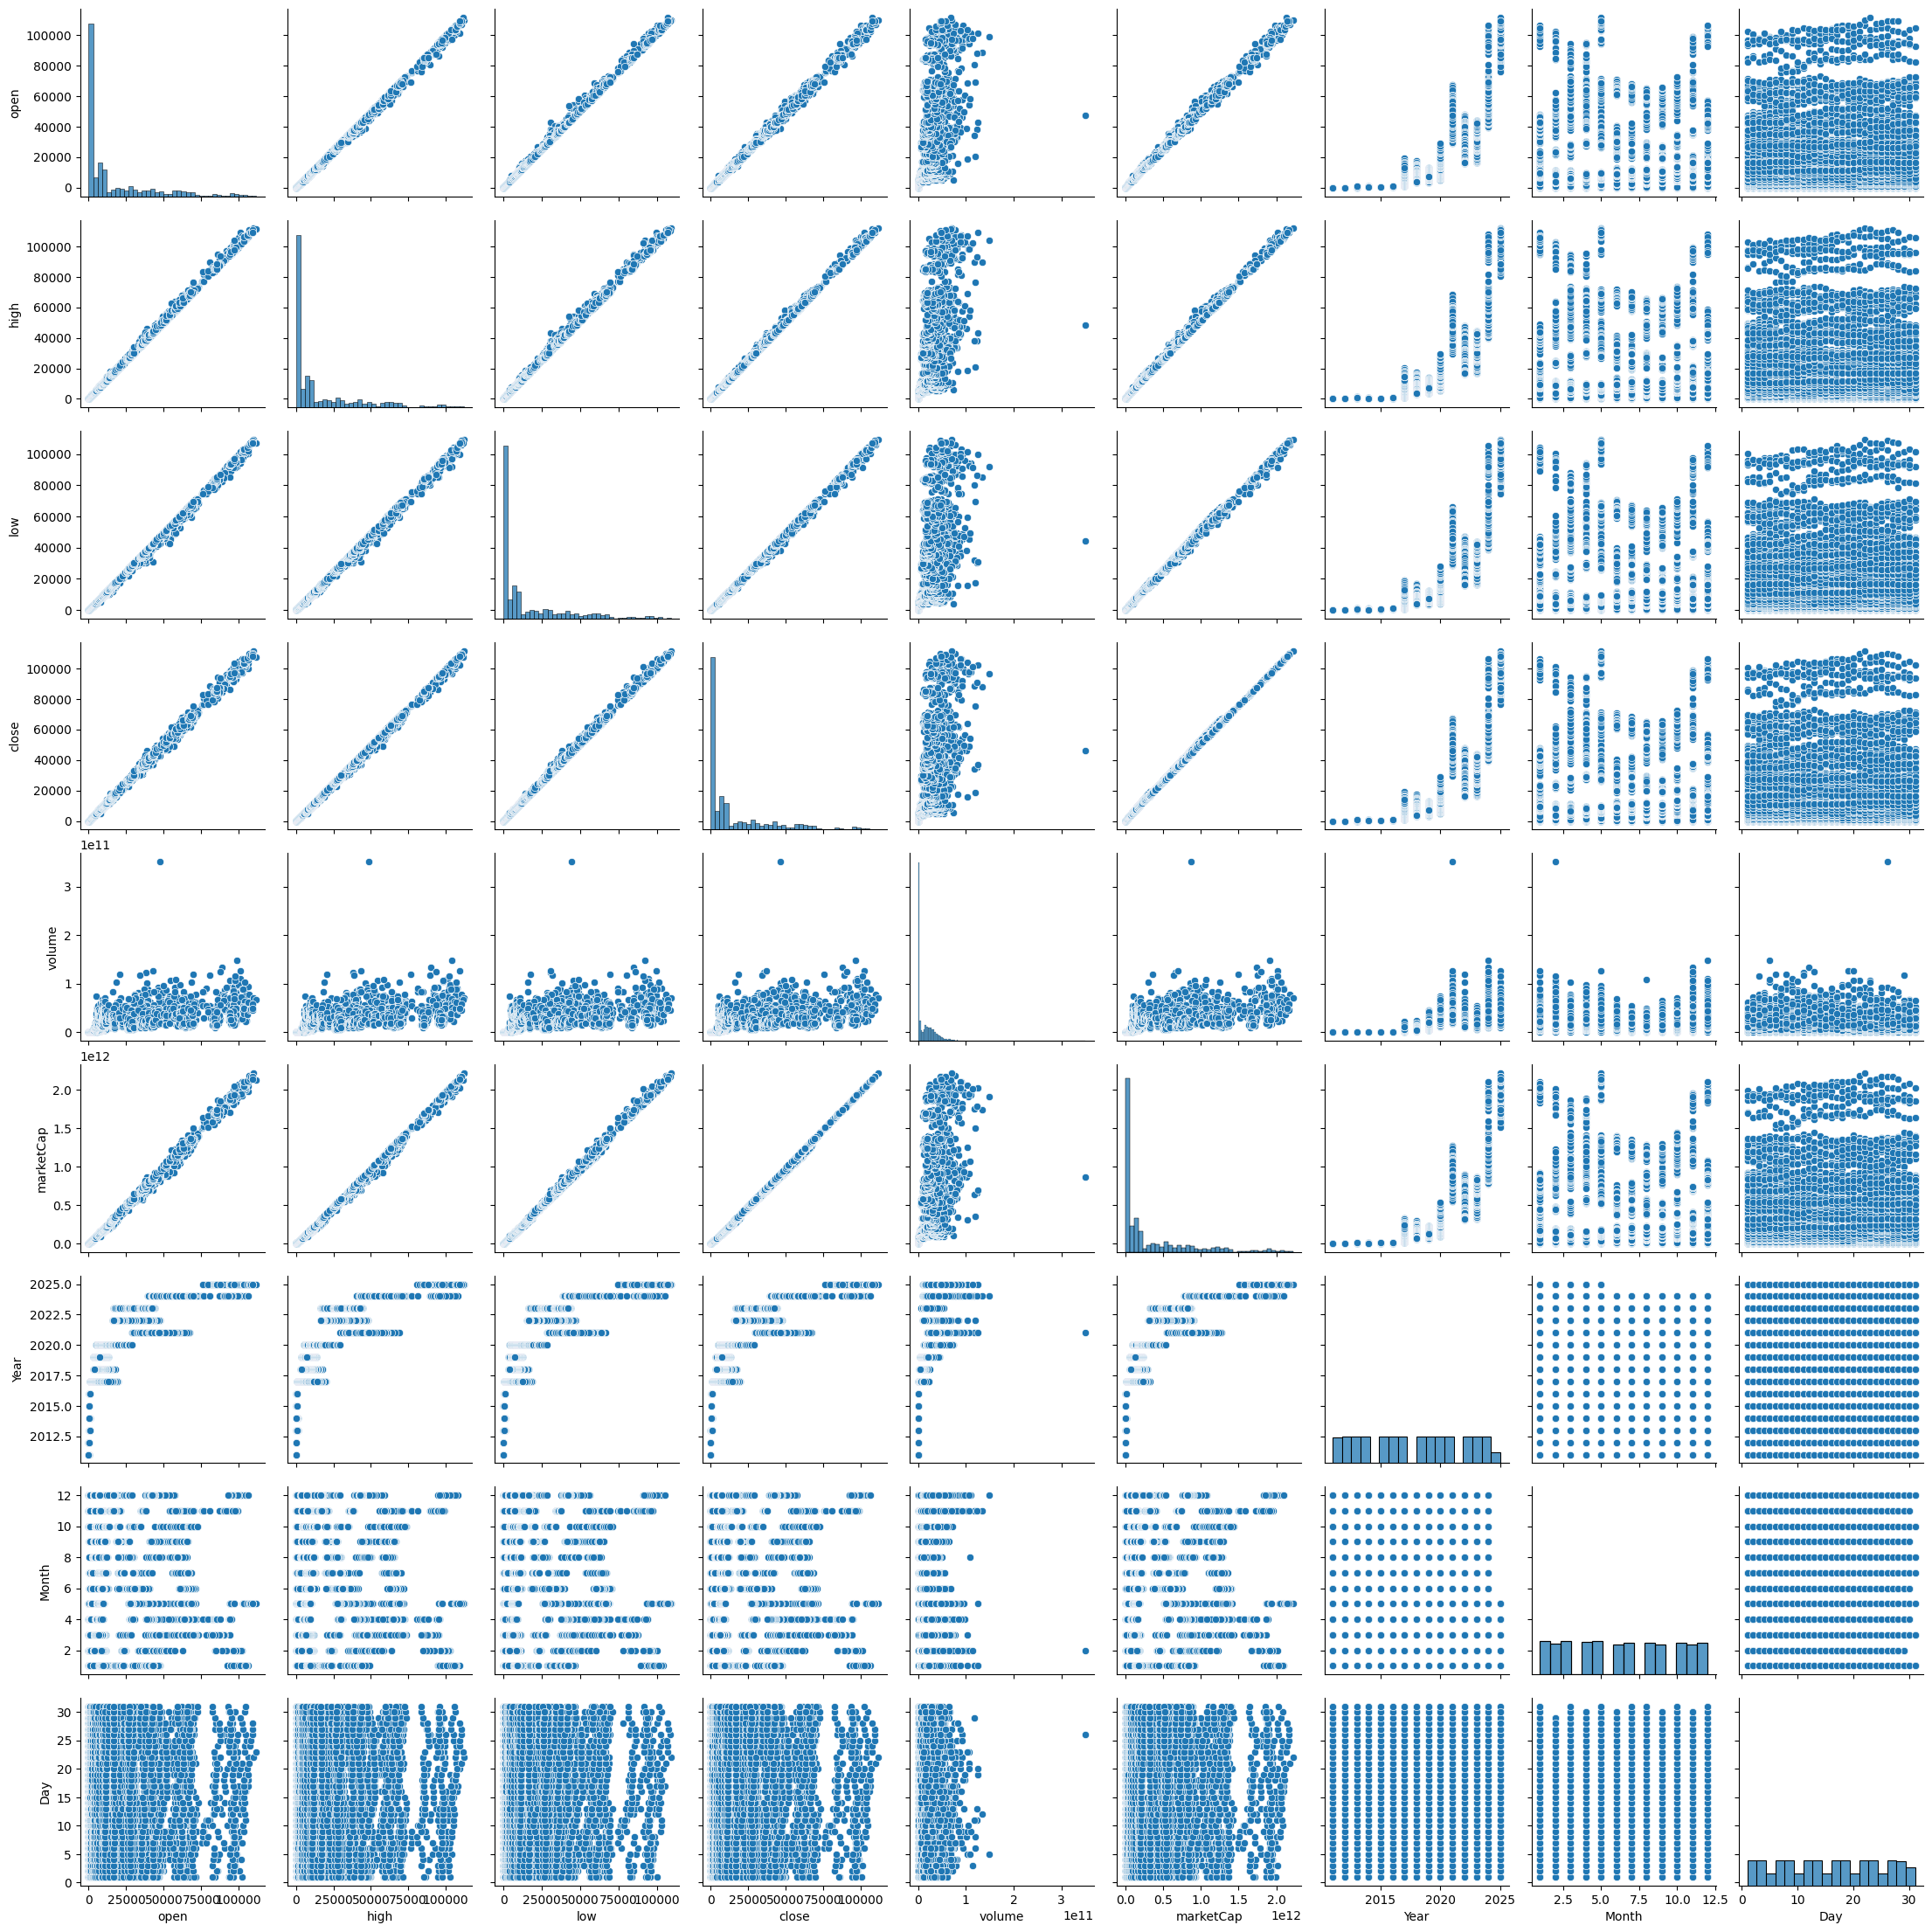

In [17]:
sns.pairplot(data=df)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('close',axis=1)
y = df['close']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
X_train

array([[ 0.21060084,  0.19705789,  0.21914655, ...,  1.27564128,
        -1.28934536, -0.66007684],
       [-0.10884483, -0.09717273, -0.11830177, ..., -0.18181979,
         1.60592184,  1.04006045],
       [-0.295981  , -0.3028079 , -0.2931456 , ...,  0.30400057,
         1.31639512, -1.22678927],
       ...,
       [ 2.86698839,  2.81984395,  2.80961597, ...,  1.76146163,
        -0.99981864,  0.47334802],
       [ 3.14545085,  3.08303223,  3.14535537, ...,  1.76146163,
        -0.71029192,  0.92671796],
       [-0.67554186, -0.67674282, -0.67453167, ..., -1.15346049,
        -0.4207652 , -0.54673435]], shape=(3682, 8))

In [25]:
y_train

4422    21651.183780
2549    14026.599610
3229     9342.527179
613        10.917762
3955    61318.957770
            ...     
3092    10144.556720
3772    57828.050630
5191    84167.193400
5226    93943.793420
860       115.242996
Name: close, Length: 3682, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

def evaluate_regression_models(X_train, X_test, y_train, y_test):
    # Dictionary of models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet Regression": ElasticNet(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Support Vector Regressor": SVR()
    }
    
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        results.append([name, r2, mse])
    
    # Convert to DataFrame for better visualization
    results_df = pd.DataFrame(results, columns=["Model", "R² Score", "Mean Squared Error"])
    return results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)


In [27]:
results = evaluate_regression_models(X_train, X_test, y_train, y_test)
print(results)

c:\Users\HP\Desktop\Python\Vs_Python\Projects\Bitcoin_price_prediction\BPP_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.433e+08, tolerance: 2.214e+08
  model = cd_fast.enet_coordinate_descent(


                      Model  R² Score  Mean Squared Error
0             Random Forest  0.999867        7.733918e+04
1         Gradient Boosting  0.999836        9.570783e+04
2         Linear Regression  0.999795        1.194392e+05
3          Ridge Regression  0.999776        1.302597e+05
4             Decision Tree  0.999708        1.702330e+05
5          Lasso Regression  0.999570        2.503351e+05
6     ElasticNet Regression  0.985436        8.487693e+06
7  Support Vector Regressor -0.170537        6.821758e+08


In [28]:
from sklearn.model_selection import GridSearchCV

def grid_search_models(X_train, y_train, X_test, y_test):
    # Define models and parameter grids
    models = {
        "RandomForest": (
            RandomForestRegressor(random_state=42),
            {
                "n_estimators": [100, 200],
                "max_depth": [None, 10, 20],
                "min_samples_split": [2, 5]
            }
        ),
        "GradientBoosting": (
            GradientBoostingRegressor(random_state=42),
            {
                "n_estimators": [100, 200],
                "learning_rate": [0.05, 0.1],
                "max_depth": [3, 5]
            }
        ),
        "LinearRegression": (
            LinearRegression(),
            {
                "fit_intercept": [True, False],
                "copy_X": [True, False]
            }
        )
    }

    results = []

    # Loop over models
    for name, (model, params) in models.items():
        print(f"\n🔍 Running GridSearchCV for {name}...")
        grid = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results.append({
            "Model": name,
            "Best Params": grid.best_params_,
            "R² Score": r2,
            "Mean Squared Error": mse
        })

    # Convert results into DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [29]:
# Example (assuming you already have train/test splits)
results = grid_search_models(X_train, y_train, X_test, y_test)
print(results)



🔍 Running GridSearchCV for RandomForest...

🔍 Running GridSearchCV for GradientBoosting...

🔍 Running GridSearchCV for LinearRegression...
              Model                                        Best Params  \
0      RandomForest  {'max_depth': 20, 'min_samples_split': 2, 'n_e...   
1  GradientBoosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
2  LinearRegression            {'copy_X': True, 'fit_intercept': True}   

   R² Score  Mean Squared Error  
0  0.999868        77214.507269  
1  0.999911        52131.739031  
2  0.999795       119439.233135  


In [32]:
import pickle
model = pickle.dump('Gradient Boosting',open('../model.pkl','wb'))

In [33]:
scale = pickle.dump('sclr',open('../scale.pkl','wb'))

In [34]:
df

,open,high,low,close,volume,marketCap,Year,Month,Day
0,0.300264,0.367208,0.289348,0.300000,5.350480e+03,1.511302e+06,2011,1,2
1,0.300137,0.338386,0.277848,0.297348,1.427500e+03,1.500260e+06,2011,1,3
2,0.297227,0.310119,0.248605,0.299439,1.883390e+03,1.512924e+06,2011,1,4
3,0.300773,0.392055,0.288454,0.299252,3.569800e+02,1.514282e+06,2011,1,5
4,0.299186,0.308228,0.254499,0.299292,3.445080e+03,1.516596e+06,2011,1,6
...,...,...,...,...,...,...,...,...,...
5256,107278.507000,109454.521200,106895.291100,107791.157500,4.590363e+10,2.140000e+12,2025,5,24
5257,107802.272100,109313.301500,106683.372500,109035.387000,4.751804e+10,2.170000e+12,2025,5,25
5258,109023.778300,110376.881500,108735.641900,109440.368400,4.595046e+10,2.170000e+12,2025,5,26
5259,109440.409500,110744.207800,107609.556700,108994.642200,5.745018e+10,2.170000e+12,2025,5,27
